<a href="https://colab.research.google.com/github/Touhou09/modelImplementTrial/blob/main/Nueral_Network_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신경망 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.  
신경망이 학습할 수 있도록 하는 지표인 '손실함수'에 대해 알아보고 손실함수의 값을 작게 만드는 함수의 기울기를 활용하는 '경사법'에 대해 알아본다.

# 데이터에서 학습한다.

* 데이터 주도 학습  
신경망은 기계학습이나 사람과 다르게 이미지를 '있는 그대로' 학습한다.  
신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점이 있다.  
즉, 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 처음부터 끝까지 학습 가능하다.

* 훈련 데이터와 시험 데이터  
기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적이다.  
우선 훈련데이터만을 사용하여 최적의 매개변수를 찾고 그 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.  
우리에게 필요한 것은 범용적인 모델이므로 훈련 데이터와 시험 데이터를 분리하여 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는지 확인하는 것이다.  
만약 특정 데이터셋에만 지나치게 최적화되어 다른 데이터셋에서는 정확도가 낮은 경우 지나치게 최적화 되었다는 의미의 '오버피팅' 이라고 부른다.

# 손실 함수

신경망은 하나의 지표를 기준으로 최적의 매개변수 값을 탐색하는데 이를 '손실함수' 라고 부른다.

* 오차제곱합  
가장 흔하게 쓰는 손실함수는 오차제곱합이고 수식은 아래와 같다

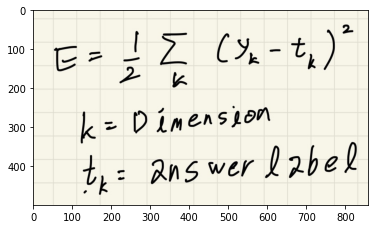

In [50]:
# 오차제곱합 식
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.imshow(imread('/content/신경망 학습-1.jpg'))

In [ ]:
'''
위의 식에서 3.6의 손글씨 숫자 인식의 경우, t와 y의 원소는 다음과 같다.
'''

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

위 배열의 경우에서 y는 소프트맥스 함수의 출력이므로 확률로 해석할때의 값들이다.  
t는 정답을 가리키는 원소로 정답인 경우의 t[2]가 1의 값을 갖고 나머지 원소들은 0의 원소를 갖는다.

위의 t처럼 정답 레이블이 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 'one-hot encoding'이라 부른다.

이 오차제곱법을 파이썬으로 구현하면 아래와 같다

In [ ]:
import numpy as np

def sum_squares_error(y,t):
  return 0.5 * np.sum((y-t)**2)

식을 직접 적용해보면 아래와 같다.

In [ ]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))

0.5975

위의 경우에서 출력이 작으면 작을수록 정답 레이블과의 오차도 작은 것을 알 수 있다.  
즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단 가능하다.

* 교차 엔트로피 오차  
또 다른 손실함수로 자주 사용되는 경우 중 하나이다.  
수식은 아래와 같다.  

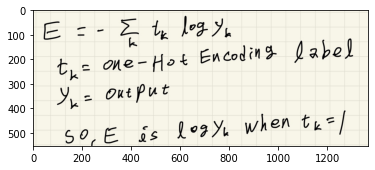

In [51]:
# 교차 엔트로피 수식
plt.imshow(imread('/content/신경망 학습-2.jpg'))

위의 식에서 E는 정답 레이블에서 y의 자연로그를 구하는 식이다.  
신경망 출력이 0.6일때 -log0.6 = 0.51, 0.1일때 -log0.1 = 2.30이다.  
이는 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 결정한다.  
즉, 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일때 0이 된다.  
반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

이를 파이썬으로 구현하면 아래와 같다.

In [ ]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y + delta))

여기서 delta는 np.log()함수에 0을 입력하면 -inf가 되어 더 이상 계산을 진행할 수 없기 때문에 추가한다.  
아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 하는 것이다.

실제로 이 함수를 사용하면 아래와 같다.

In [ ]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

* 미니배치 학습
기계학습 문제는 훈련 데이터를 사용해서 학습한다.  
정확히는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.  
이렇게 하려면 모든 훈련 데이터를 대상으로 손실함수 값을 구해야 한다.  

이를 수식으로 표현하면 아래와 같다.

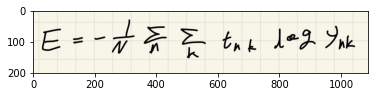

In [52]:
# 교차 엔트로비 데이터셋 전체에 적용 수식
plt.imshow(imread('/content/신경망 학습-3.jpg'))

식 자체는 교차 엔트로피 함수를 N으로 확장시키고 그것을 N으로 나누어 '평균 손실 함수'를 구하는 것이다.  
이렇게 평균을 사용하면 훈련 데이터의 갯수와 관계없이 언제든지 통일된 지표를 얻을 수 있다.  

만약 데이터가 아주 큰 수, 예를들어 MNIST의 60000개나 수백, 수천만 이상의 데이터의 경우 데이터의 일부를 추려 전체의 근사치로 이용 가능하다.  
신경망의 경우에도 훈련 데이터로부터 일부만을 골라 학습을 수행한다.  
그 일부를 '미니 배치'라고 부른다.  
예를 들면 MNIST의 60000개의 데이터 중 1000개 정도를 무작위로 뽑아 그 1000장만을 학습하는 것이다.  
이를 미니배치 학습법이라고 부른다.

미니배치 학습을 직접 구현하는 코드는 아래와 같다.

In [ ]:
import sys, os
sys.path.append()
from dataset.mnist import load_mnist

(x_train,t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)


위의 훈련 데이터에서 무작위로 10개를 빼내려면 numpy의 random.choice()함수를 쓰면 다음과 같이 해결한다.

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice()로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있다.  


* 배치용 교차 엔트로피 오차 구현하기  
미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 위에서 구현한 교차 엔트로피 오차를 조금만 바꿔주면 된다.  
여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현한다.  

구현 코드는 아래와 같다.

In [37]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

위의 코드에서 t는 정답 레이블이고 y는 신경망의 출력이다.  
y가 1차원이라면 (데이터 하나당 교차 엔트로피 오차를 구하는 경우는) reshape 함수로 데이터의 형상을 바꿔준다.  
그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.  

정답 레이블이 원-핫 인코딩이 아니라 2나 7등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 아래와 같이 구현한다.

In [38]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

위의 구현에서 one-hot encoding일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다.  
다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.  
그래서 one-hot encoding시 t*np.log(y)였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size), t])로 구현한다.  
참고로 np.arange(batch_size)는 0부터 batch_size -1 까지 배열을 생성한다.  
즉, batch_size가 5일때, [0,1,2,3,4]라는 배열을 생성한다.  
np.log(y[np.arange(batch_size), t])는 [2,7,0,9,4]에서 [y[0,2],y[1,7],y[2,0],y[3,9],y[4,4]]인 배열이 생성된다.

* 손실함수를 설정한 이유  
신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.  
이때 매개변수의 미분(정확하게는 기울기를)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.  
가령 가상의 신경망에서 어느 한 가중치 매개변수에 주목한다고 할때 그 가중치 매개변수의 손실 함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시킬때, 손실 함수가 어떻게 변하나'라는 의미이다.  
만약 이 미분값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있고 반대로 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.  
그러나 미분값이 0이면 손실함수의 값은 줄어들지 않고 가중치 매개변수의 갱신은 거기서 멈춘다.  

정확도가 매개변수인 경우에는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문에 정확도는 매개변수에 적합하지 않다.

# 수치 미분

* 미분  
수치미분의 파이썬 구현은 아래와 같다.

In [39]:
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

* 수치 미분의 예  
y = 0.01x^2 + 0.1x  
위의 식을 파이썬으로 구현하면 아래와 같다.  


In [41]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

이어서 위 함수를 그려본다.

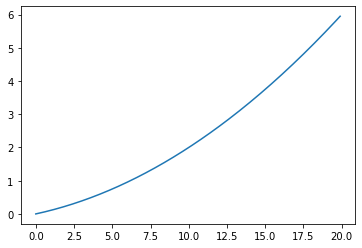

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.plot(x,y)
plt.show()

x=5일때와 x=10일때의 함수의 미분을 계산해보면 아래와 같다.

In [44]:
numerical_diff(function_1,5)

numerical_diff(function_1,10)

0.2999999999986347

* 편미분  
f(x0,x1) = x0^2 + x1^2  
위 식을 파이썬으로 구현하면 아래와 같다.

In [45]:
def function_2(x):
  return x[0]**2 + x[1]**2

또한 위 식을 미분하는데, x0와 x1중 어느 변수에 대한 미분이냐를 구별해야하고 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.  
이 편미분에 대한 계산의 예시는 아래와 같다.

In [49]:
# x0=3, x1=4 에서 x0에 대한 편미분
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

# x0=3, x1=4 에서 x0에 대한 편미분
def function_tmp2(x1):
  return 3.0**2 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

위 문제들은 변수가 하나인 함수를 정의하고 그 함수를 미분하는 형태로 구현하여 풀었다.  

이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.  
단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.  
앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의했고 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구했다.